## Beispiel 19.4: Berechnung der Umsetzung eines kugelförmigen Partikels nach dem isothermen Modell des schrumpfenden Partikels

_(Dieses Beispiel finden Sie im Lehrbuch auf Seite 315)_

In diesem Berechnungsbeispiel sollen der Reaktionsfortschritt einer Gas-Feststoff-Reaktion bei einem kugelförmigen schrumpfenden Partikel bei isothermen Verhältnissen betrachtet werden. Die erforderlichen Gleichungen ergeben sich aus den Ausdrücken in Tabelle 19.7 (Seite 315) mit Gleichung 19.12 (Seite 297), sind aber auch noch einmal explizit auf Seite 315 angegeben.

---

### Laden der benötigten Pakete

Innerhalb dieses Beispiels werden die Pakete _numpy_ und _matplotlib.pyplot_ benötigt. Während _numpy_ wichtige Rechenoperationen und Funktionalitäten bereitstellt, werden mit Hilfe des Pakets _matplotlib.pyplot_ die Ergebnisse grafisch dargestellt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

### Festlegung von Parametern

#### Geschwindigkeitskonstante der Reaktion

Die Geschwindigkeitskonstante der Chlorierungsreaktion

Cl<sub>2</sub> + Ni ⇌ NiCl<sub>2</sub>

hat den Wert:

In [2]:
k_s = 0.1 # m / s

#### Konzentration der gasförmigen Spezies

Die Chlorkonzentration $c_{1,\mathrm{b}}$ im Kern der Gasphase beträgt:

In [3]:
c_1b = 5.0 # mol / m^3

#### Eigenschaften des Feststoffs

Die Dichte des Nickels und die charakteristische Abmessung $L=d_\mathrm{p}/2$ des kugelförmigen Partikels betragen:

In [4]:
rho_2 = 151770 # mol / m^3
L = 0.0025 # m

#### Stoffübergang des Gases

Der Stoffübergangskoeffizient zu Beginn der Reaktion $k_{1,\mathrm{G},0}$ und der Exponent für den Einfluss der Partikelabmessung $m$ haben folgende Werte:

In [5]:
k_1G0 = 0.05 # m / s
m = 0.5 # -

Als Verhältnis von Stoffübergangskoeffizient zu Beginn der Reaktion $k_{1,\mathrm{G},0}$ und Geschwindigkeitskonstante $k_\mathrm{s}$ ergibt sich die dimensionslose Kenngröße $W_1$ schließlich zu:

In [6]:
W_1 = 0.5 # -

---

### Berechnung der Reaktionszeiten

Mit den angegebenen Gleichungen können nun die Reaktionszeiten (in der Einheit Minuten) bei Limitierung des Vorgangs durch Reaktion $t_\mathrm{R}$ bzw. durch Diffusion im Gasfilm $t_\mathrm{G}$ sowie die Gesamtreaktionszeit $t=t_\mathrm{R}+t_\mathrm{G}$ und der relative Anteil der Reaktionszeit bei Filmdiffusionslimitierung $t=t_\mathrm{G}/(t_\mathrm{R}+t_\mathrm{G})$ in Abhängigkeit vom Umsatzgrad des Nickels $U$ berechnet werden.

In [7]:
def t_R(U):
    return (1-(1-U)**(1/3)) * L * rho_2 / (60*k_s*c_1b)

def t_G(U):
    return (1-(1-U)**((1+m)/3)) * L * rho_2 / (60*k_s*c_1b*W_1*(1+m))

def t(U):
    return (t_R(U)+t_G(U))

def ratio(U):
    return (t_G(U)/t(U))

---

### Darstellung der Ergebnisse

Für die Darstellung der Ergebnisse muss der zu betrachtende Umsatzgradbereich $U_\mathrm{range}$ angegeben werden. In diesem Fall ist dies der Bereich von 0 bis 1 in Schritten von 0.001.

In [8]:
U_range = np.linspace(0.001, 1.0, 1001) # -

Anschließend werden die Funktionen in Abhängigkeit vom Umsatzgrad mit Hilfe des Pakets _matplotlib.pyplot_ dargestellt.

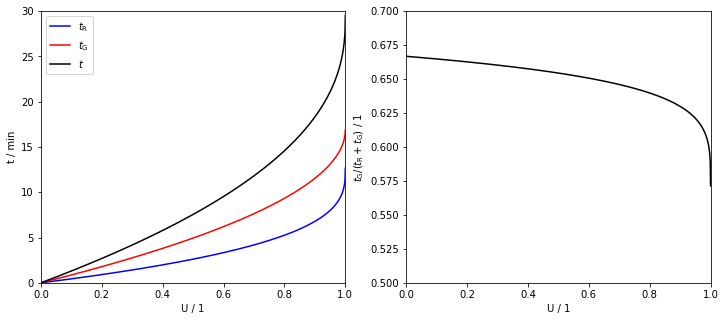

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(U_range, t_R(U_range), color='blue', label="$t_\mathrm{R}$")
ax1.plot(U_range, t_G(U_range), color='red', label="$t_\mathrm{G}$")
ax1.plot(U_range, t(U_range), color='black', label="$t$")
ax1.set_xlabel("U / 1")
ax1.set_ylabel("t / min")
ax1.set_xlim(0.0,1.0)
ax1.set_ylim(0,30)
ax1.legend(loc='best')

ax2.plot(U_range, ratio(U_range), color='black')
ax2.set_xlabel("U / 1")
ax2.set_ylabel("$t_\mathrm{G}/(t_\mathrm{R}+t_\mathrm{G})$ / 1")
ax2.set_xlim(0.0,1.0)
ax2.set_ylim(0.5,0.7)

plt.show()

Die Berechnungsergebnisse sind ebenfalls im Lehrbuch in Abbildung 19.9 auf Seite 316 dargestellt.